**Nama : Faiz Rofi Hencya**

**NIM  : 1301190230**

# **Visualisasi geospatial kasus positif COVID19 di Indonesia per tanggal 1 Juli 2021 dengan basis provinsi**

Sumber Data : 
*   Data batas provinsi diambil dari github https://github.com/Alf-Anas
*   Data Covid Indonesia diambil dari https://www.kaggle.com/datasets/hendratno/covid19-indonesia

## **Install And Import Libraries**

In [46]:
pip uninstall shapel

In [25]:
pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import geoplot as gplt
import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot.crs as gcrs
from datetime import datetime
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

from IPython.display import Image

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

## **Geospasial Map Indonesia (Batas Provinsi)**

In [83]:
!wget https://github.com/Alf-Anas/batas-administrasi-indonesia/raw/master/batas_provinsi/Batas%20Provinsi%20SHP.zip

--2022-05-26 09:02:13--  https://github.com/Alf-Anas/batas-administrasi-indonesia/raw/master/batas_provinsi/Batas%20Provinsi%20SHP.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alf-Anas/batas-administrasi-indonesia/master/batas_provinsi/Batas%20Provinsi%20SHP.zip [following]
--2022-05-26 09:02:13--  https://raw.githubusercontent.com/Alf-Anas/batas-administrasi-indonesia/master/batas_provinsi/Batas%20Provinsi%20SHP.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 753577 (736K) [application/zip]
Saving to: ‘Batas Provinsi SHP.zip.1’

Batas Provinsi SHP. 100%[===================>] 735.92K 

In [84]:
# !apt install unzip
!unzip "Batas Provinsi SHP.zip"

Archive:  Batas Provinsi SHP.zip
replace Batas Provinsi.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Batas Provinsi.shx      
replace Batas Provinsi.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Batas Provinsi.cpg      
replace Batas Provinsi.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Batas Provinsi.dbf      
replace Batas Provinsi.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Batas Provinsi.prj      
replace Batas Provinsi.qpj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Batas Provinsi.qpj      
replace Batas Provinsi.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Batas Provinsi.shp      


In [85]:
map_indonesia = gpd.read_file("Batas Provinsi.shp")
map_indonesia.head()

,No,Kode_Prov,Provinsi,geometry
0,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ..."
1,22.0,53,NUSA TENGGARA TIMUR,"MULTIPOLYGON (((122.65419 -8.63712, 122.62966 ..."
2,25.0,63,KALIMANTAN SELATAN,"MULTIPOLYGON (((114.88632 -2.50353, 114.91290 ..."
3,27.0,65,KALIMANTAN UTARA,"MULTIPOLYGON (((116.58930 4.37422, 116.61513 4..."
4,30.0,76,SULAWESI BARAT,"MULTIPOLYGON (((119.86380 -1.96121, 119.87027 ..."


In [86]:
prov = map_indonesia.Provinsi.unique()
prov, prov.shape 

(array(['NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN SELATAN',
        'KALIMANTAN UTARA', 'SULAWESI BARAT', 'MALUKU UTARA', 'RIAU',
        'DAERAH ISTIMEWA YOGYAKARTA', 'PAPUA', 'PAPUA BARAT',
        'KALIMANTAN TIMUR', 'BENGKULU', 'ACEH', 'SUMATERA UTARA',
        'KEPULAUAN BANGKA BELITUNG', 'SUMATERA BARAT', 'LAMPUNG',
        'DKI JAKARTA', 'JAWA TENGAH', 'KEPULAUAN RIAU', 'BALI',
        'KALIMANTAN BARAT', 'KALIMANTAN TENGAH', 'SULAWESI UTARA', 'JAMBI',
        'SULAWESI TENGAH', 'GORONTALO', 'JAWA BARAT', 'JAWA TIMUR',
        'MALUKU', 'SULAWESI SELATAN', 'SUMATERA SELATAN', 'BANTEN',
        'SULAWESI TENGGARA'], dtype=object), (34,))

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


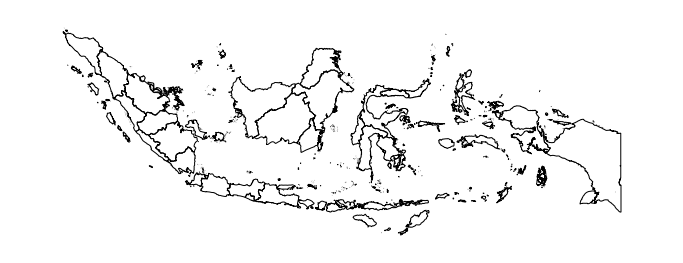

In [87]:
#GeoPlot Map Indonesia
gplt.polyplot(map_indonesia, figsize=(12, 16))

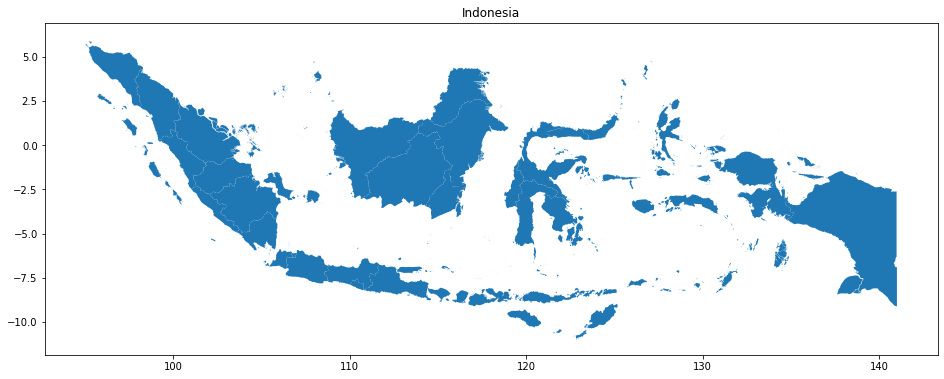

In [88]:
#Plot Map Indonesia
map_indonesia.plot(figsize = (16,18))
plt.title('Indonesia')
plt.show()

## **Dataset Covid-19 Indonesia**

**Import Data Kasus Covid 19 Indonesia**

In [89]:
covid_indo = pd.read_csv("https://github.com/Hencya/Geospatial_Covid19_Indonesia/blob/main/covid_19_indonesia_time_series_all.csv?raw=true") 
covid_indo.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


**Filtering Kolom Data Covid Indonesia**

In [90]:
filtered_data = ['Date','Location','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
covid_data = covid_indo[filtered_data]
covid_data = covid_data.apply(lambda x : x.astype(str).str.upper())
covid_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,3/1/2020,DKI JAKARTA,2,0,0,2,39,20,41,-22
1,3/2/2020,DKI JAKARTA,2,0,0,2,41,20,41,-20
2,3/2/2020,INDONESIA,2,0,0,2,2,0,0,2
3,3/2/2020,RIAU,1,0,0,1,2,0,3,-1
4,3/3/2020,DKI JAKARTA,2,0,0,2,43,20,41,-18


In [91]:
#Mengonversi ke jenis nilai yang tepat
numbercases = covid_data.loc[:,"New Cases":"Total Active Cases"].astype(int)
time = pd.DataFrame(covid_data.loc[:,'Date'].apply(pd.to_datetime))
location = pd.DataFrame(covid_data.loc[:,'Location'].astype(str))

**Rekonstruksi Data Covid**

In [92]:
covid_data_final = pd.concat ([time.reset_index(drop=True), location.reset_index(drop=True), numbercases.reset_index(drop=True)],axis=1)
covid_data_final

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,41,-22
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,41,-20
2,2020-03-02,INDONESIA,2,0,0,2,2,0,0,2
3,2020-03-02,RIAU,1,0,0,1,2,0,3,-1
4,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,41,-18
...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,SULAWESI UTARA,2,0,0,2,34715,1056,33566,93
21755,2021-12-02,SUMATERA BARAT,4,0,0,4,89849,2152,87605,92
21756,2021-12-02,SUMATERA SELATAN,4,0,0,4,59937,3071,56830,36
21757,2021-12-02,SUMATERA UTARA,4,0,1,3,106045,2889,103061,95


In [93]:
#Menggabungkan covid_data_final ke Map_Indonesia
covid_ind = covid_data_final.merge(map_indonesia, how='inner', left_on=['Location'], right_on=['Provinsi'])
covid_ind.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,No,Kode_Prov,Provinsi,geometry
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,41,-22,16.0,31,DKI JAKARTA,"MULTIPOLYGON (((106.94862 -6.22221, 106.94394 ..."
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,41,-20,16.0,31,DKI JAKARTA,"MULTIPOLYGON (((106.94862 -6.22221, 106.94394 ..."
2,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,41,-18,16.0,31,DKI JAKARTA,"MULTIPOLYGON (((106.94862 -6.22221, 106.94394 ..."
3,2020-03-04,DKI JAKARTA,2,0,0,2,45,20,41,-16,16.0,31,DKI JAKARTA,"MULTIPOLYGON (((106.94862 -6.22221, 106.94394 ..."
4,2020-03-05,DKI JAKARTA,0,1,0,-1,45,21,41,-17,16.0,31,DKI JAKARTA,"MULTIPOLYGON (((106.94862 -6.22221, 106.94394 ..."


## **Visualisasi Geospasial (Choropleth Map) 1 Juli 2021**

In [94]:
#Memfilter covid_data_final hanya untuk satu tanggal : 1 July 2021
filtered_data = covid_data_final.loc[covid_data_final['Date']=='2021-07-01']
filtered_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
16353,2021-07-01,ACEH,92,3,53,36,19338,809,14693,3836
16354,2021-07-01,BALI,311,9,116,186,50529,1569,46983,1977
16355,2021-07-01,BANTEN,300,2,19,279,57424,1397,49745,6282
16356,2021-07-01,BENGKULU,178,0,83,95,10309,191,8898,1220
16357,2021-07-01,DKI JAKARTA,7541,46,3527,3968,551003,8445,468202,74356


In [95]:
#Menggabungkan filtered_data ke Map_Indonesia
covid_indonesia = filtered_data.merge(map_indonesia, how='inner', left_on=['Location'], right_on=['Provinsi'])
covid_indonesia.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,No,Kode_Prov,Provinsi,geometry
0,2021-07-01,ACEH,92,3,53,36,19338,809,14693,3836,1.0,11,ACEH,"MULTIPOLYGON (((98.07694 2.57227, 98.08125 2.5..."
1,2021-07-01,BALI,311,9,116,186,50529,1569,46983,1977,10.0,51,BALI,"MULTIPOLYGON (((114.43174 -8.17209, 114.43928 ..."
2,2021-07-01,BANTEN,300,2,19,279,57424,1397,49745,6282,21.0,36,BANTEN,"MULTIPOLYGON (((106.76734 -6.36151, 106.59386 ..."
3,2021-07-01,BENGKULU,178,0,83,95,10309,191,8898,1220,7.0,17,BENGKULU,"MULTIPOLYGON (((103.69868 -4.65818, 103.70621 ..."
4,2021-07-01,DKI JAKARTA,7541,46,3527,3968,551003,8445,468202,74356,16.0,31,DKI JAKARTA,"MULTIPOLYGON (((106.94862 -6.22221, 106.94394 ..."


Text(0.5, 1.0, 'Sebaran Kasus Positif COVID19 (Total Cases) di Indonesia per Tanggal 1 Juli 2021')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


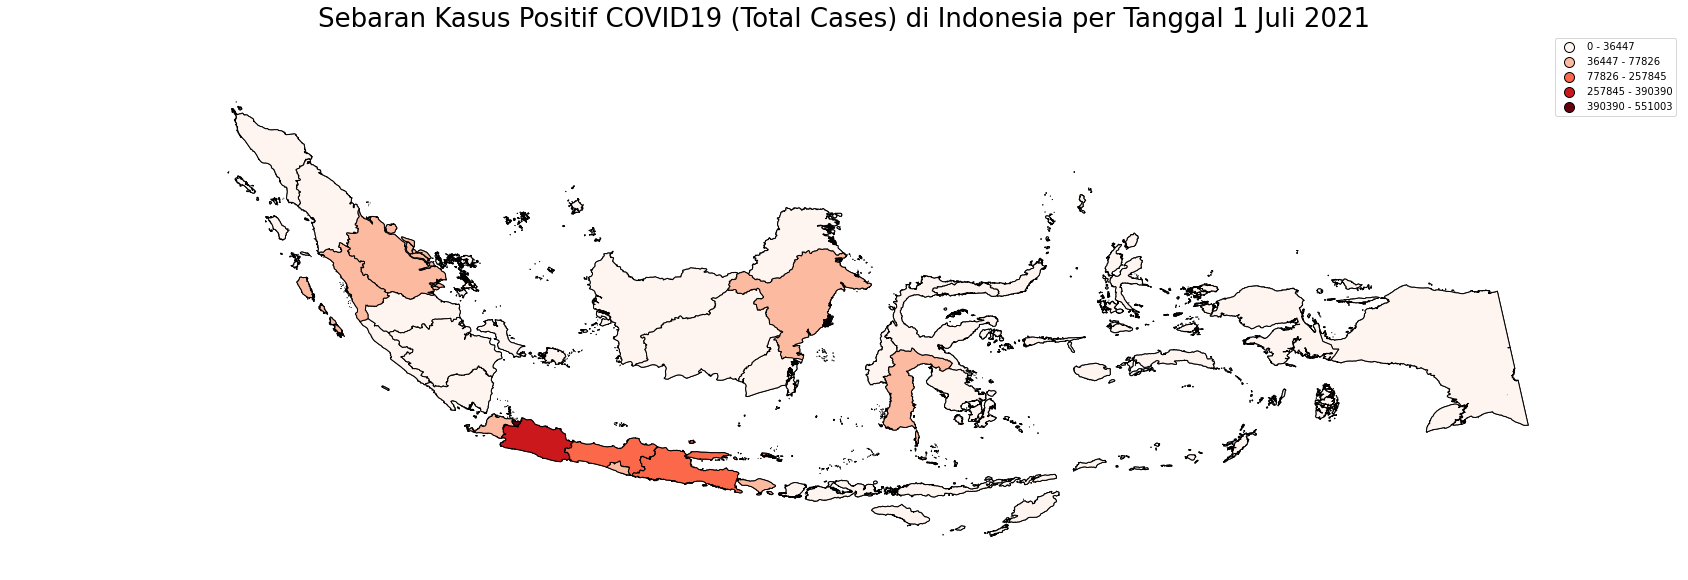

In [96]:
#memvisualisasikan  plot choropleth dari "Total Cases"
covid_indonesia = GeoDataFrame(covid_indonesia)
ax = gplt.polyplot(
    covid_indonesia, 
    facecolor="lightgray",
    figsize=(30, 10),
    projection=gcrs.AlbersEqualArea()
)

gplt.choropleth(
    covid_indonesia,
    hue="Total Cases",
    edgecolor="black",
    linewidth=1,
    cmap="Reds",
    legend=True,
    scheme="FisherJenks",
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

ax.set_title(
    'Sebaran Kasus Positif COVID19 (Total Cases) di Indonesia per Tanggal 1 Juli 2021',
    fontsize=26
)

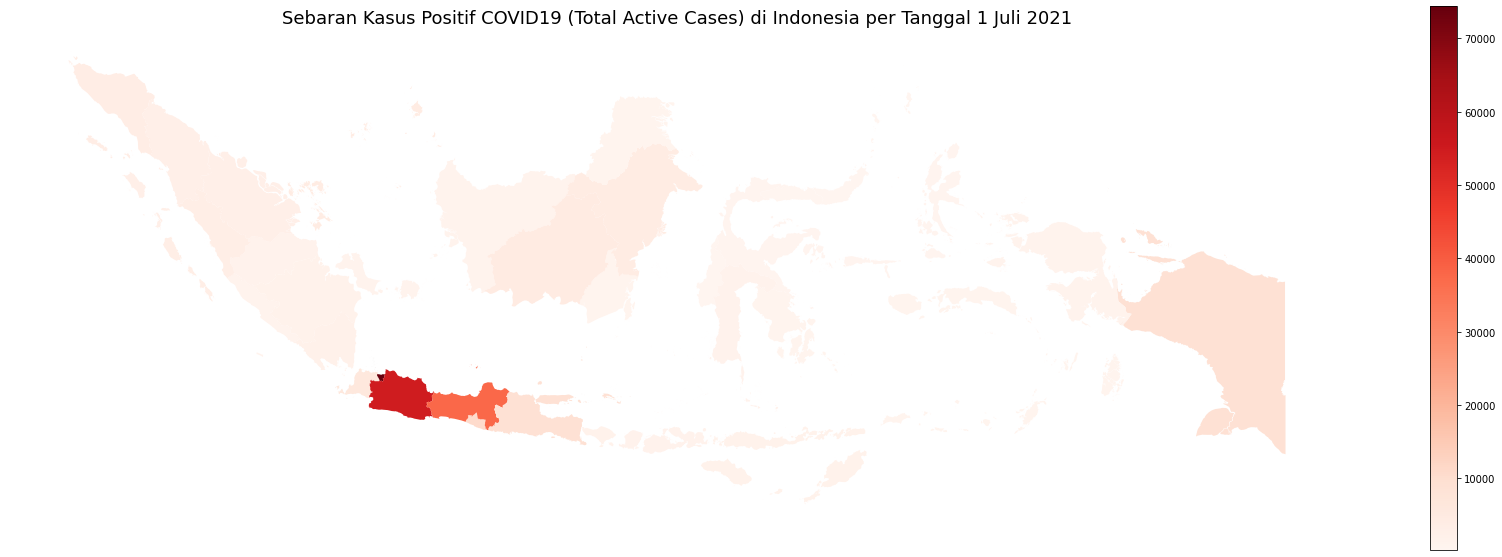

In [97]:
#Mengubah tipe dataset menjadi GeoDataFrame dan memplot Peta dari "Total Active Case"
covid_indonesia.plot(column='Total Active Cases', cmap="Reds", legend=True, figsize = (30,10))
plt.axis('off')
plt.title('Sebaran Kasus Positif COVID19 (Total Active Cases) di Indonesia per Tanggal 1 Juli 2021', fontsize=18)
plt.show()

## **Visualisasi Geospasial (Choropleth Map) Juli - Desember 2021**

In [98]:
#drop baris duplikat & sorting date_set secara asc 
date_set = covid19_ind.YearMonth.drop_duplicates() 
date_set.sort_values(ascending=True, inplace=True) 

#memilih bulan Juli - Desember
date_set = date_set[16:22] 
date_set

16    2021/07
17    2021/08
18    2021/09
19    2021/10
20    2021/11
21    2021/12
Name: YearMonth, dtype: object

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part 

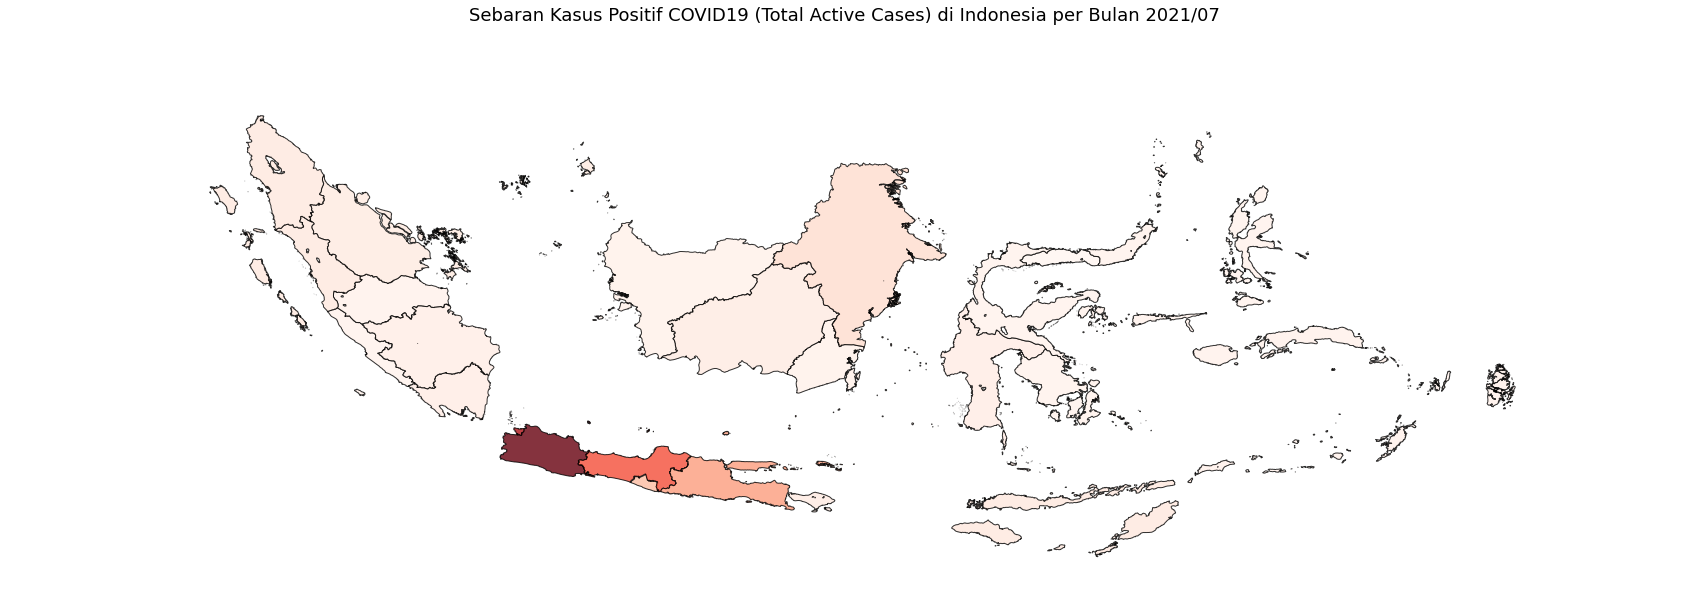

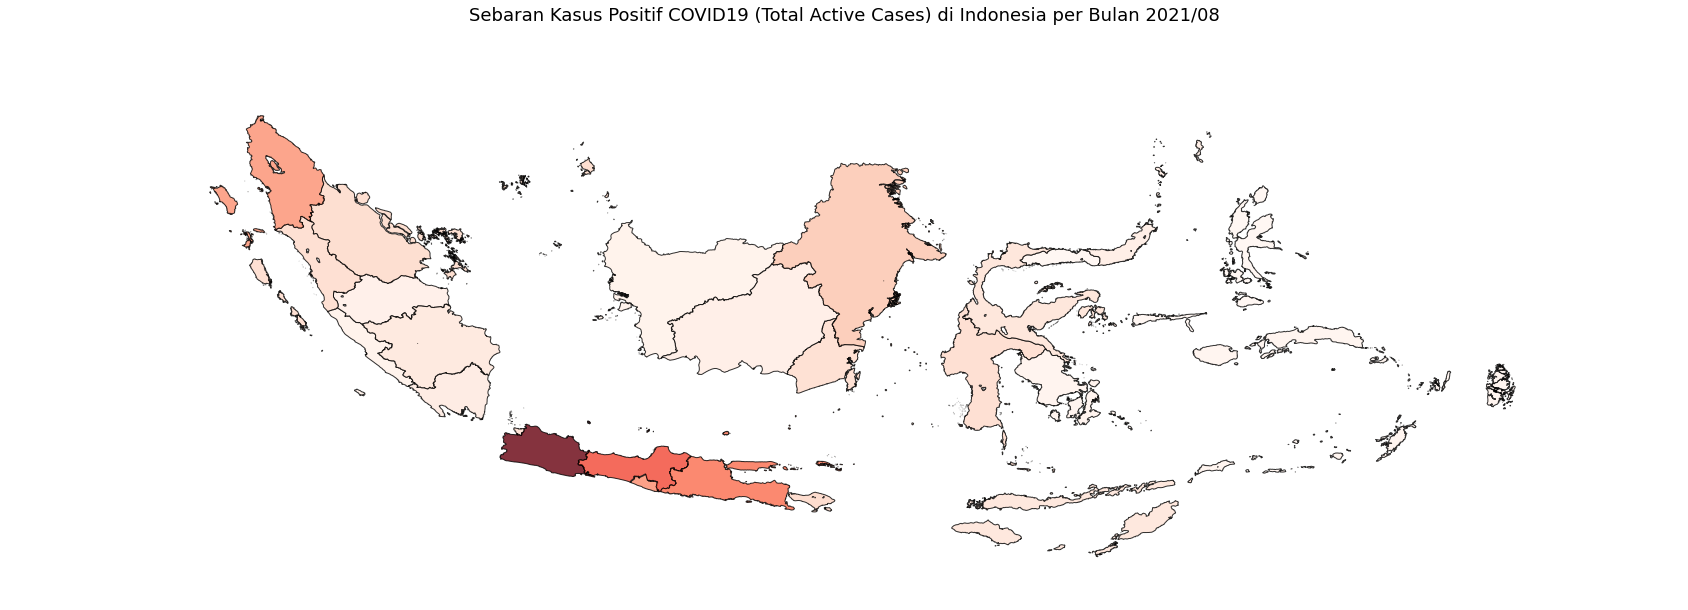

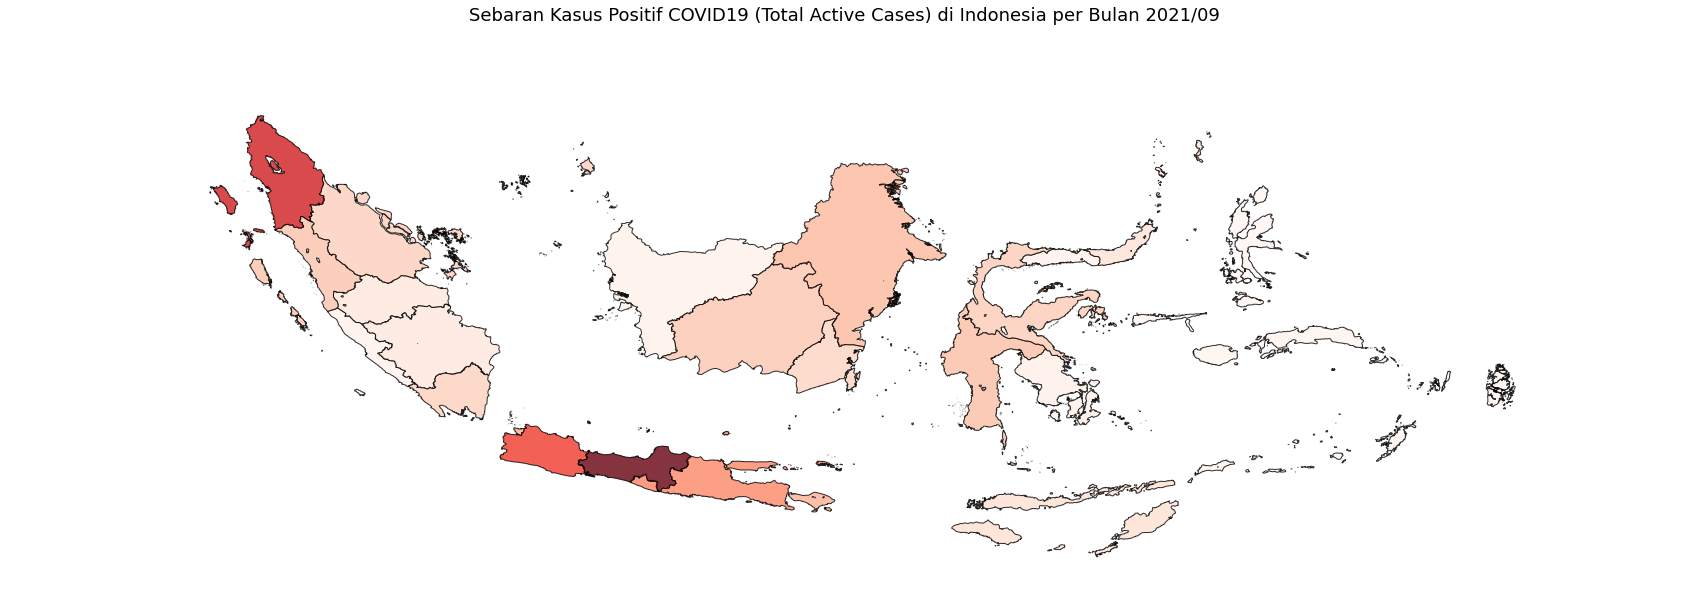

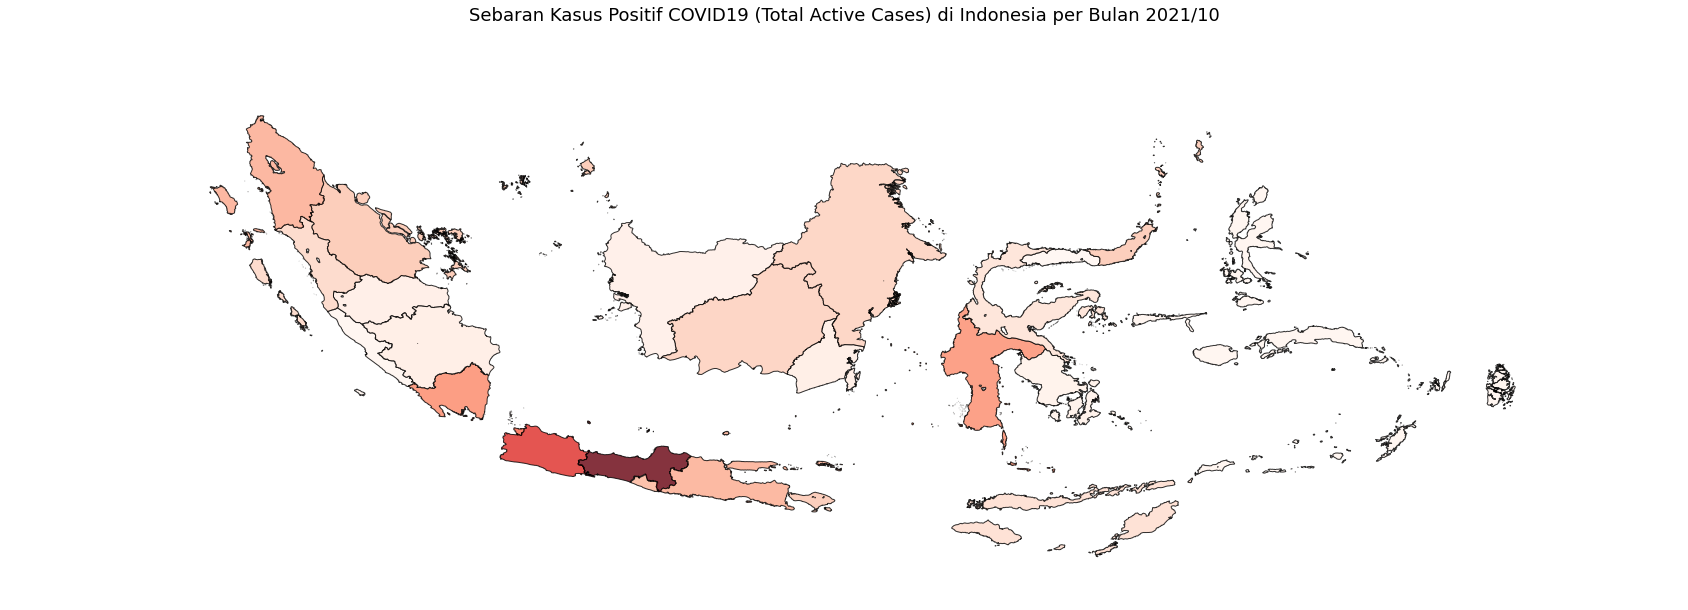

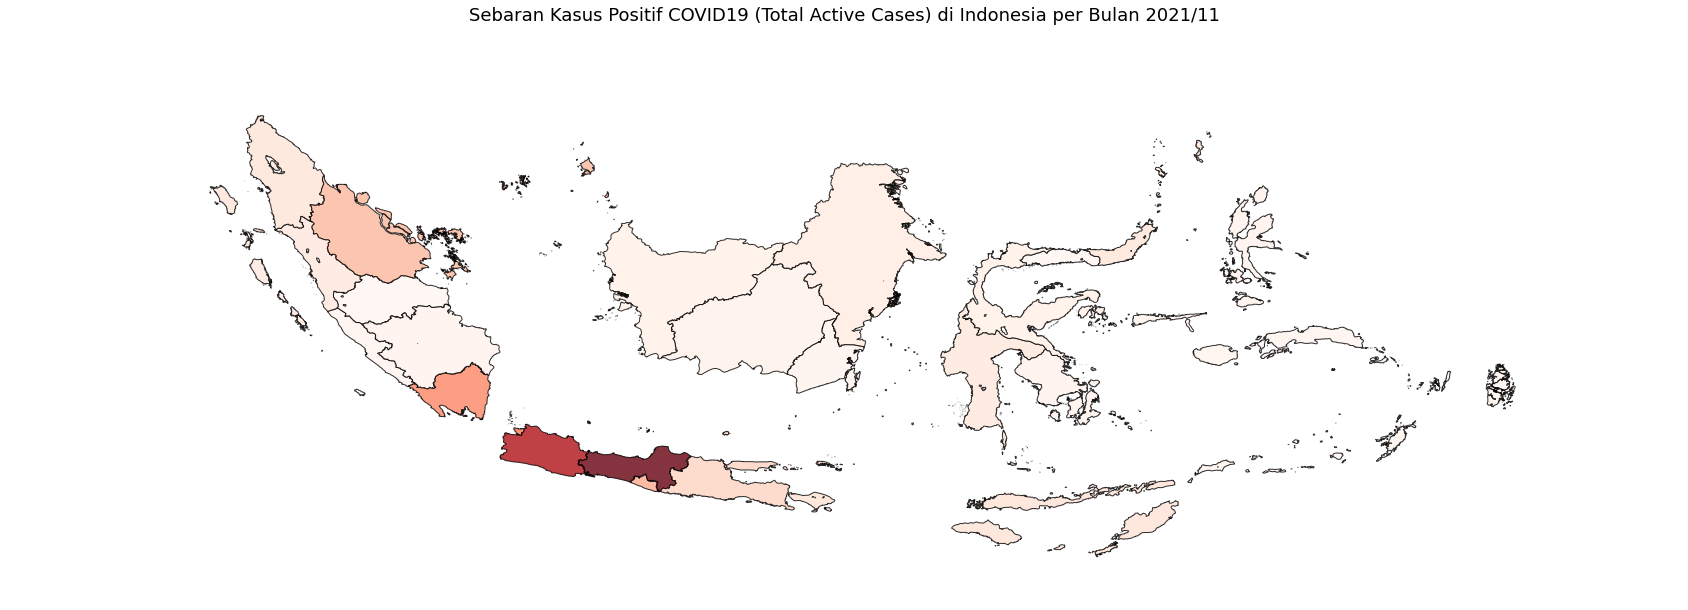

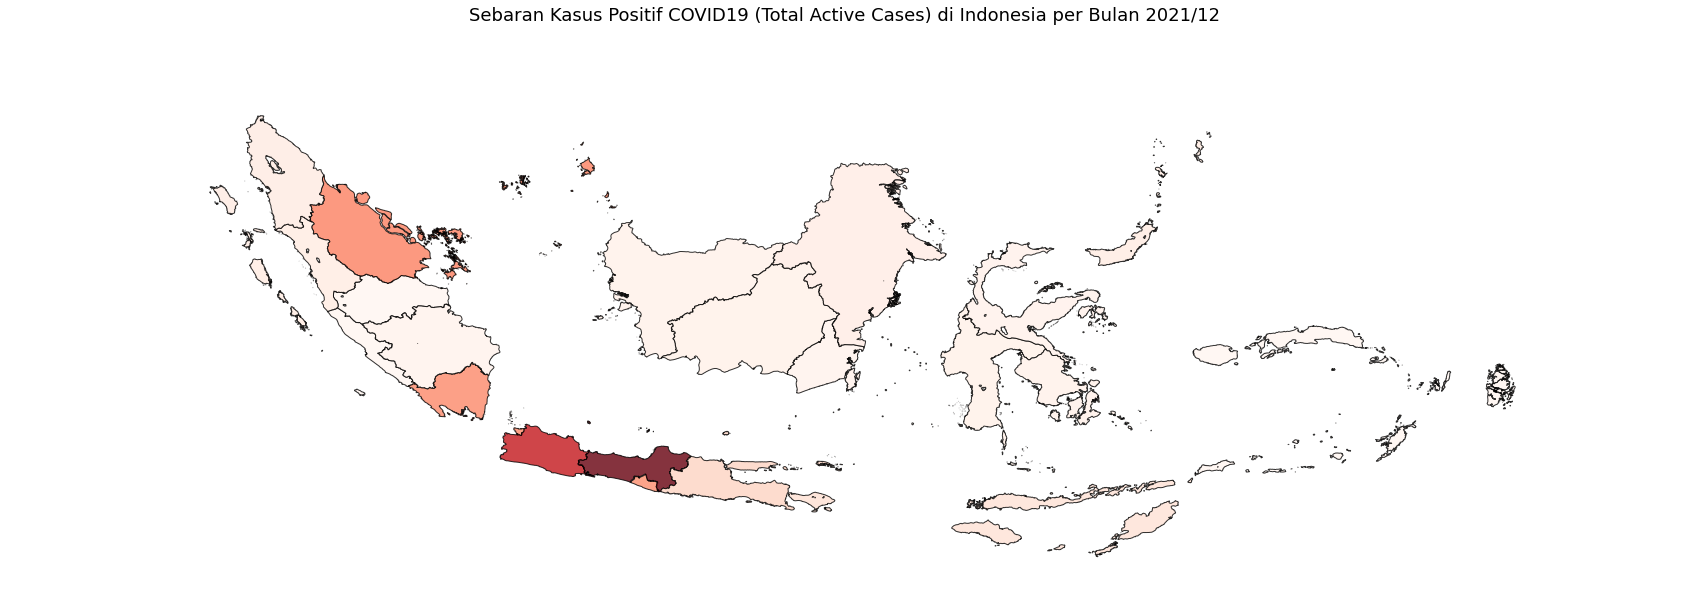

In [99]:
image_files= []
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)
i=0
covid19_ind = GeoDataFrame(covid19_ind)
for date in date_set:
    i+=1
    pandas_temp = covid19_ind[covid19_ind["YearMonth"] == date]
    ax = gplt.choropleth(
    pandas_temp,
    hue= "Total Active Cases",
    edgecolor="black",
    linewidth=1,
    cmap="Reds",
    alpha = 0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
    )
    
    ax.set_title(
    f"Sebaran Kasus Positif COVID19 (Total Active Cases) di Indonesia per Bulan {date}",
    fontsize=18
    )
    file_name = str(anim_path / "{}.png".format(i))
    plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
    image_files.append(file_name)

# **Visualisasi Geospasial (Choropleth Map) Animasi GIF**

In [100]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = "Covid 19 Indonesia Juli - Desember 2021.gif"
imageio.mimsave(gif_path, images, fps=2)

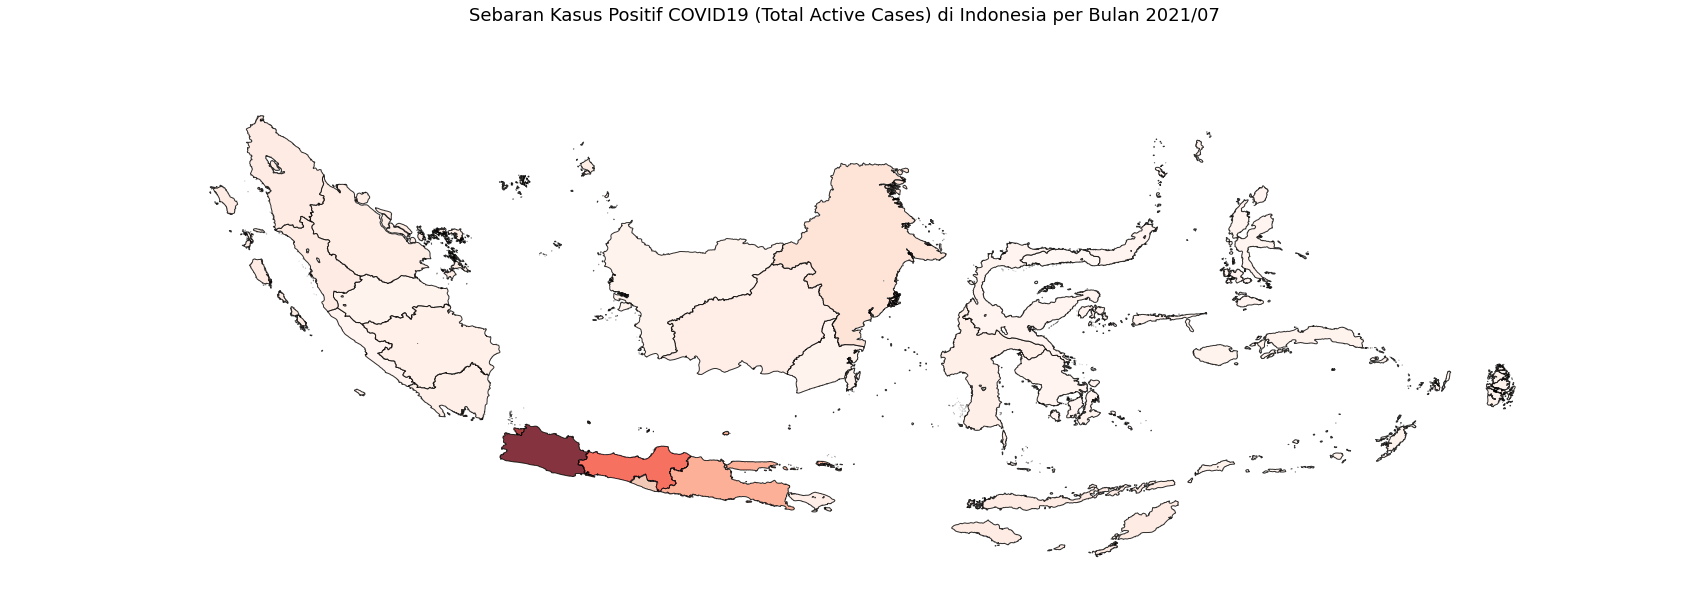

In [101]:
Image(open('Covid 19 Indonesia Juli - Desember 2021.gif','rb').read())